In [49]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
import yfinance as yf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [50]:
#pull data from yahoo finance
data =yf.download(tickers='GSK', period='max', interval = '1d', start='2007-01-01')
gsk_df = pd.DataFrame(data)
gsk_df.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,53.790001,54.110001,53.650002,53.810001,25.182247,2085500
2007-01-04,54.470001,54.950001,54.380001,54.720001,25.608114,2524000
2007-01-05,54.349998,54.419998,53.590000,53.959999,25.252439,1108500
2007-01-08,52.880001,53.009998,52.570000,52.660000,24.644056,1580100
2007-01-09,52.950001,52.970001,52.529999,52.669998,24.648748,1411600
2007-01-10,52.610001,52.799999,52.439999,52.730000,24.676825,1001000
2007-01-11,52.849998,53.220001,52.730000,53.070000,24.835939,1140900
2007-01-12,53.580002,53.880001,53.509998,53.750000,25.154158,1743200
2007-01-16,54.900002,54.900002,54.419998,54.540001,25.523882,2167700


In [10]:
# gather GSk History
gsk = yf.Ticker("GSK")
gsk_hist = gsk.history(period="max")
gsk_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-28,0.000000,0.168357,0.156611,0.156611,2400,0.0,0.0
1980-03-31,0.156611,0.156611,0.156611,0.156611,0,0.0,0.0
1980-04-02,0.000000,0.168357,0.156611,0.156611,800,0.0,0.0
1980-04-11,0.000000,0.172272,0.160526,0.160526,1600,0.0,0.0
1980-04-14,0.160526,0.160526,0.160526,0.160526,0,0.0,0.0
...,...,...,...,...,...,...,...
2021-07-26,39.180000,39.240002,38.990002,39.020000,3033300,0.0,0.0
2021-07-27,39.180000,39.570000,39.000000,39.520000,4152100,0.0,0.0
2021-07-28,39.099998,39.610001,38.930000,39.500000,4476700,0.0,0.0


In [11]:
# Create dataframe from historic closing ptices 
gsk_hist.Close.to_frame()

,Close
Date,
1980-03-28,0.156611
1980-03-31,0.156611
1980-04-02,0.156611
1980-04-11,0.160526
1980-04-14,0.160526
...,...
2021-07-26,39.020000
2021-07-27,39.520000
2021-07-28,39.500000


In [13]:
# RETREIVE QUARTERLY FINANCIAL REPORTS FROM YF 
gsk.quarterly_financials

,2021-06-30,2021-03-31,2020-12-31,2020-09-30
Research Development,1222000000.0,1103000000.0,1322000000.0,1066000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1470000000.0,1518000000.0,821000000.0,1671000000.0
Minority Interest,6201000000.0,6145000000.0,6221000000.0,6339000000.0
Net Income,1395000000.0,1073000000.0,677000000.0,1244000000.0
Selling General Administrative,2642000000.0,2318000000.0,2692000000.0,2489000000.0
Gross Profit,5538000000.0,4980000000.0,5777000000.0,5928000000.0
Ebit,1675000000.0,1609000000.0,1991000000.0,2458000000.0
Operating Income,1675000000.0,1609000000.0,1991000000.0,2458000000.0
Other Operating Expenses,-1000000.0,-50000000.0,-228000000.0,-85000000.0


In [14]:
# retrieve cash flow data 
gsk.cashflow

,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Investments,2.853000e+09,-1.990000e+08,-1.650000e+08,1.690000e+08
Change To Liabilities,2.250000e+08,2.630000e+08,1.310000e+08,1.100000e+07
Total Cashflows From Investing Activities,2.161000e+09,-5.354000e+09,-1.553000e+09,-1.443000e+09
Net Borrowings,-4.234000e+09,3.515000e+09,8.124000e+09,-9.900000e+08
Total Cash From Financing Activities,-1.013200e+10,-1.840000e+09,-6.389000e+09,-6.380000e+09
Change To Operating Activities,-1.590000e+08,-1.600000e+08,1.800000e+07,7.400000e+07
Issuance Of Stock,2.900000e+07,5.100000e+07,7.400000e+07,5.600000e+07
Net Income,5.749000e+09,4.645000e+09,3.623000e+09,1.532000e+09
Change In Cash,4.310000e+08,7.440000e+08,4.870000e+08,-1.005000e+09
Effect Of Exchange Rate,-3.900000e+07,-8.200000e+07,8.000000e+06,-1.000000e+08


In [16]:
# retreive analyst recommendations from yahoo Finance
gsk.recommendations['To Grade'].value_counts()

Buy               13
Neutral           11
Hold              10
Underweight        4
Equal-Weight       3
Underperform       3
Market Perform     2
Overweight         2
Outperform         2
Sell               1
                   1
Name: To Grade, dtype: int64

In [17]:
#gather earnings by calendar date
gsk.calendar

,0,1
Earnings Date,2017-02-01 00:00:00,2017-02-06 00:00:00
Earnings Average,0.57,0.57
Earnings Low,0.57,0.57
Earnings High,0.57,0.57
Revenue Average,10543400000,10543400000
Revenue Low,10476500000,10476500000
Revenue High,10580700000,10580700000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

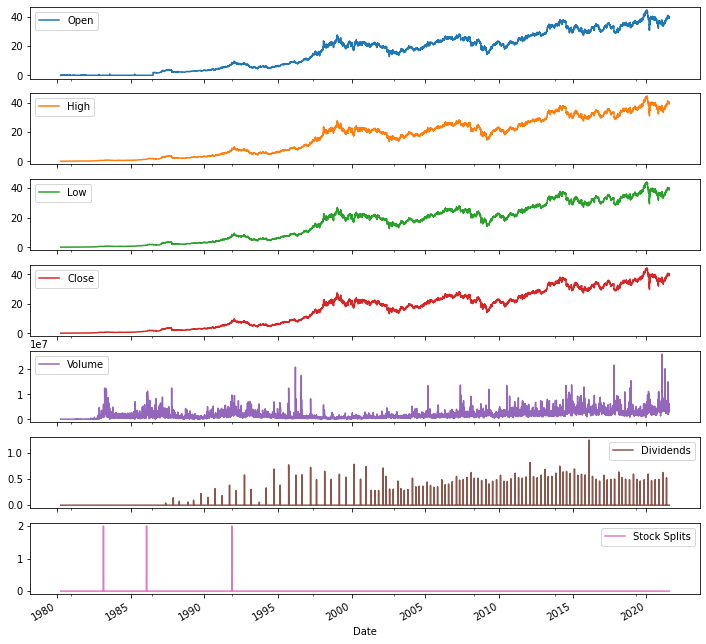

In [18]:
# plot gsk history
gsk_hist.plot(kind='line', figsize=(12,12), subplots=True)

In [20]:
#Gaher PFe data 
pfe = yf.Ticker("PFE")
pfe_hist = pfe.history(period="max")

In [21]:
pfe.info

{'zip': '10017',
 'sector': 'Healthcare',
 'fullTimeEmployees': 78500,
 'longBusinessSummary': 'Pfizer Inc. discovers, develops, manufactures, markets, distributes, and sells biopharmaceutical products worldwide. It offers medicines and vaccines in various therapeutic areas, including cardiovascular metabolic and pain under the Eliquis, Chantix/Champix, and Premarin family brands; biologics, small molecules, immunotherapies, and biosimilars under the Ibrance, Xtandi, Sutent, Inlyta, Retacrit, Lorbrena, and Braftovi brands; and sterile injectable and anti-infective medicines under the Sulperazon, Medrol, Zithromax, Vfend, and Panzyga brands. The company also provides medicines and vaccines in various therapeutic areas, such as pneumococcal disease, meningococcal disease, tick-borne encephalitis, and COVID-19 under the Prevnar 13/Prevenar 13 (pediatric/adult), Nimenrix, FSME/IMMUN-TicoVac, Trumenba, and the Pfizer-BioNTech COVID-19 vaccine brands; biosimilars for chronic immune and infla

In [56]:
# Create dataframe from historic closing ptices 
pfe_close = pd.DataFrame(pfe_hist.Close.to_frame()).dropna()

In [23]:
# RETREIVE QUARTERLY FINANCIAL REPORTS FROM YF 
pfe.quarterly_financials

,2021-07-04,2021-04-04,2020-12-31,2020-09-27
Research Development,2271000000.0,2011000000.0,2828000000.0,2352000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,6608000000.0,5682000000.0,178000000.0,2176000000.0
Minority Interest,NaN,245000000.0,235000000.0,236000000.0
Net Income,5563000000.0,4877000000.0,594000000.0,2194000000.0
Selling General Administrative,2556000000.0,2385000000.0,3481000000.0,2923000000.0
Gross Profit,11985000000.0,10410000000.0,8797000000.0,9634000000.0
Ebit,6227000000.0,5142000000.0,1632000000.0,3461000000.0
Operating Income,6227000000.0,5142000000.0,1632000000.0,3461000000.0
Other Operating Expenses,None,None,None,None


In [24]:
# retrieve cash flow data 
pfe.cashflow

,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Investments,-1.672000e+09,9.304000e+09,6.434000e+09,-2.194000e+09
Change To Liabilities,3.530000e+08,-3.400000e+08,4.040000e+08,4.600000e+07
Total Cashflows From Investing Activities,-4.271000e+09,-3.945000e+09,4.525000e+09,-4.740000e+09
Net Borrowings,-1.275500e+10,8.764000e+09,-9.350000e+08,-9.410000e+08
Total Cash From Financing Activities,-9.649000e+09,-8.485000e+09,-2.044100e+10,-1.335000e+10
Change To Operating Activities,1.357000e+09,-1.393000e+09,1.520000e+08,1.386000e+09
Issuance Of Stock,4.250000e+08,3.940000e+08,1.259000e+09,8.620000e+08
Net Income,9.616000e+09,1.627300e+10,1.115300e+10,2.130800e+10
Change In Cash,4.750000e+08,1.250000e+08,-2.050000e+08,-1.235000e+09
Effect Of Exchange Rate,-8.000000e+06,-3.200000e+07,-1.160000e+08,5.300000e+07


In [25]:
# retreive analyst recommendations from yahoo Finance
pfe.recommendations['To Grade'].value_counts()

Buy               44
Overweight        19
Outperform        18
Neutral           18
Market Perform    15
Equal-Weight      13
Hold               7
Sell               3
Sector Perform     2
Reduce             1
Long-Term Buy      1
                   1
Name: To Grade, dtype: int64

In [27]:
#gather earnings by calendar date
pfe.calendar

,0,1
Earnings Date,2021-10-25 00:00:00,2021-10-29 00:00:00
Earnings Average,0.96,0.96
Earnings Low,0.78,0.78
Earnings High,1.12,1.12
Revenue Average,18451800000,18451800000
Revenue Low,14635000000,14635000000
Revenue High,23101000000,23101000000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

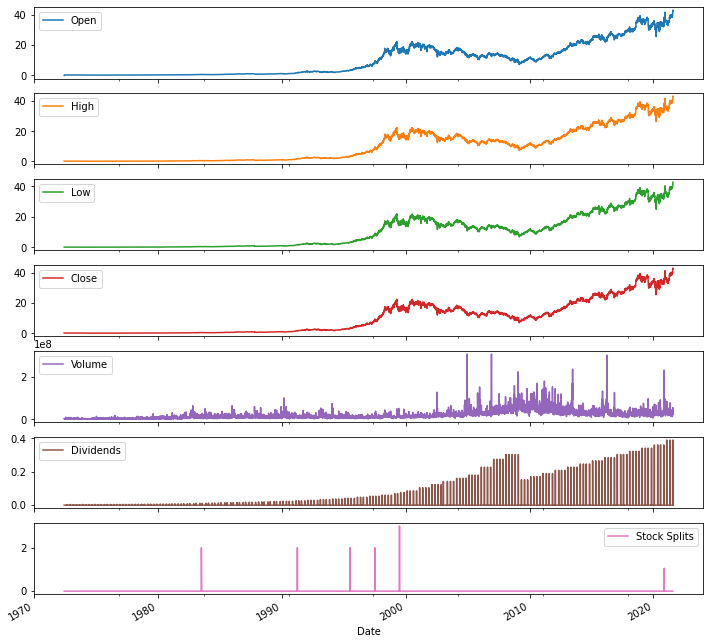

In [28]:
# plot pfe history
pfe_hist.plot(kind='line', figsize=(12,12), subplots=True)

LSTM Stock Predictor Using Closing Prices

In [29]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [57]:
pfe_close.head()

,Close
Date,
1972-06-01,0.183906
1972-06-02,0.181677
1972-06-05,0.181120
1972-06-06,0.185021
1972-06-07,0.185021


In [65]:
X.shape

(12395, 1)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(pfe_close)


In [71]:
pfe_scaled = scaler.transform(pfe_close)

In [75]:
# Define the features set 'X', and the target 'y' set.
X = pfe_scaled
y = pfe_scaled

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [74]:
pfe_scaled.shape

(12395, 1)

In [61]:
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)


ValueError: Found array with dim 3. Estimator expected <= 2.

In [41]:
# Use the `pct_change` function to calculate daily returns
pharma_returns = pharma_df.pct_change().dropna()

# Display sample data
pharma_returns.head()

,GSK,PFE
2008-08-12,-0.008873,-0.006549
2008-08-13,-0.004997,-0.003550
2008-08-14,-0.000209,0.007125
2008-08-15,-0.004186,0.009601
2008-08-18,-0.011559,-0.016517


In [42]:
# Fetch news about GSK
gsk_news = newsapi.get_everything(
    q=" GSK AND GlaxoSmithKline",
    language="en"
    
)

# Show the total number of news
gsk_news["totalResults"]

216

In [43]:
# Fetch news about PFE
pfe_news = newsapi.get_everything(
    q=" PFE AND Pfizer",
    language="en"
    
)

# Show the total number of news
pfe_news["totalResults"]

319

In [51]:
gsk_sentiment = []
analyzer = SentimentIntensityAnalyzer()

for article in gsk_news["articles"]:
    try:
        date = article["publishedAt"][:10] # Measure for the date
        text = article["content"][0:198]
        sentiment = analyzer.polarity_scores(text) # Getting polarity scores so we can build our sentiment from the analyzer
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        compound = sentiment["compound"] # Compound sentiment
        
        gsk_sentiment.append({
            "text": text,
            "date": date,
            "positive": pos,
            "neutral": neu,
            "negative": neg,
            "compound": compound # Compound sentiment
        })
        
    except AttributeError:
        pass
gsk_sentiment_df = pd.DataFrame(gsk_sentiment)
gsk_sentiment_df['date'] = pd.to_datetime(gsk_sentiment_df['date'])
gsk_sentiment_df.set_index('date', inplace=True)
# Set the reorganized columns for the dataframe
gsk_sentiment_df.describe()

,positive,neutral,negative,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.035650,0.952800,0.011550,0.096225
std,0.063242,0.072283,0.029523,0.287230
min,0.000000,0.751000,0.000000,-0.542300
25%,0.000000,0.927000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.062750,1.000000,0.000000,0.220025
max,0.192000,1.000000,0.108000,0.750600


In [49]:
pfe_sentiment = []
analyzer = SentimentIntensityAnalyzer()

for article in pfe_news["articles"]:
    try:
        date = article["publishedAt"][:10] # Measure for the date
        text = article["content"][0:198]
        sentiment = analyzer.polarity_scores(text) # Getting polarity scores so we can build our sentiment from the analyzer
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        compound = sentiment["compound"] # Compound sentiment
        
        pfe_sentiment.append({
            "text": text,
            "date": date,
            "positive": pos,
            "neutral": neu,
            "negative": neg,
            "compound": compound # Compound sentiment
        })
        
    except AttributeError:
        pass
pfe_sentiment_df = pd.DataFrame(pfe_sentiment)
pfe_sentiment_df['date'] = pd.to_datetime(pfe_sentiment_df['date'])
pfe_sentiment_df.set_index('date', inplace=True)
# Set the reorganized columns for the dataframe
pfe_sentiment_df.describe()

,positive,neutral,negative,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.067000,0.884600,0.048400,0.054900
std,0.103185,0.095642,0.060897,0.511426
min,0.000000,0.634000,0.000000,-0.750600
25%,0.000000,0.825250,0.000000,-0.322475
50%,0.000000,0.909000,0.018000,0.000000
75%,0.102750,0.941250,0.088750,0.476700
max,0.366000,1.000000,0.192000,0.877900


In [52]:
#Save News DF to CSV for further use 
file_path = Path("Data/pfe_news.csv")
pfe_sentiment_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [53]:
#Save News DF to CSV for further use 
file_path = Path("Data/gsk_news.csv")
gsk_sentiment_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [63]:
#Save pharma df to CSV for further use 
pharma_path = Path("Data/pharma_returns.csv")
pharma_df.to_csv(pharma_path)

In [54]:
gsk_sentiment_df

,text,positive,neutral,negative,compound
date,,,,,
2021-07-01,"By Reuters Staff\r\nLONDON, July 1 (Reuters) -...",0.000,1.000,0.000,0.0000
2021-07-22,By Reuters Staff\r\nJuly 22 (Reuters) - GlaxoS...,0.000,1.000,0.000,0.0000
2021-07-01,By Reuters Staff\r\nJuly 1 (Reuters) - GlaxoSm...,0.000,1.000,0.000,0.0000
2021-07-02,By Reuters Staff\r\nFILE PHOTO: A GlaxoSmithKl...,0.000,1.000,0.000,0.0000
2021-07-13,A GlaxoSmithKline (GSK) logo is seen at the GS...,0.097,0.903,0.000,0.4215
2021-07-01,"LONDON, July 1 (Reuters) - Activist investor E...",0.000,1.000,0.000,0.0000
2021-07-20,"By Reuters Staff\r\n(Adds detail, background)\...",0.000,1.000,0.000,0.0000
2021-07-17,By Reuters Staff\r\nJuly 17 (Reuters) - GlaxoS...,0.000,1.000,0.000,0.0000
2021-07-02,A GlaxoSmithKline (GSK) logo is seen at the GS...,0.000,1.000,0.000,0.0000
